In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Loading the datasets

In [4]:
fashion_train_df=pd.read_csv('/Users/snigdha/Downloads/fashion-mnist_train.csv',sep = ',')

fashion_test_df=pd.read_csv('/Users/snigdha/Downloads/fashion-mnist_test.csv',sep = ',')

Viewing the head and tail

In [5]:
fashion_train_df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


shape of the data

In [7]:
print(fashion_test_df.shape)
print(fashion_train_df.shape)

(10000, 785)
(60000, 785)


Converting the data into an array

In [8]:
training =np.array(fashion_train_df,dtype ='float32')

In [9]:
testing=np.array(fashion_test_df,dtype = 'float32')

Choosing a random cell and resizing it

2.0

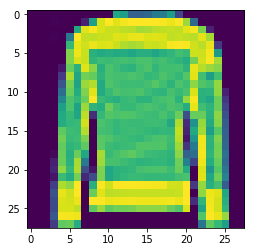

In [10]:
import random
i=random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label=training[i,0]
label

Define the view plot and then select the data randomly for training

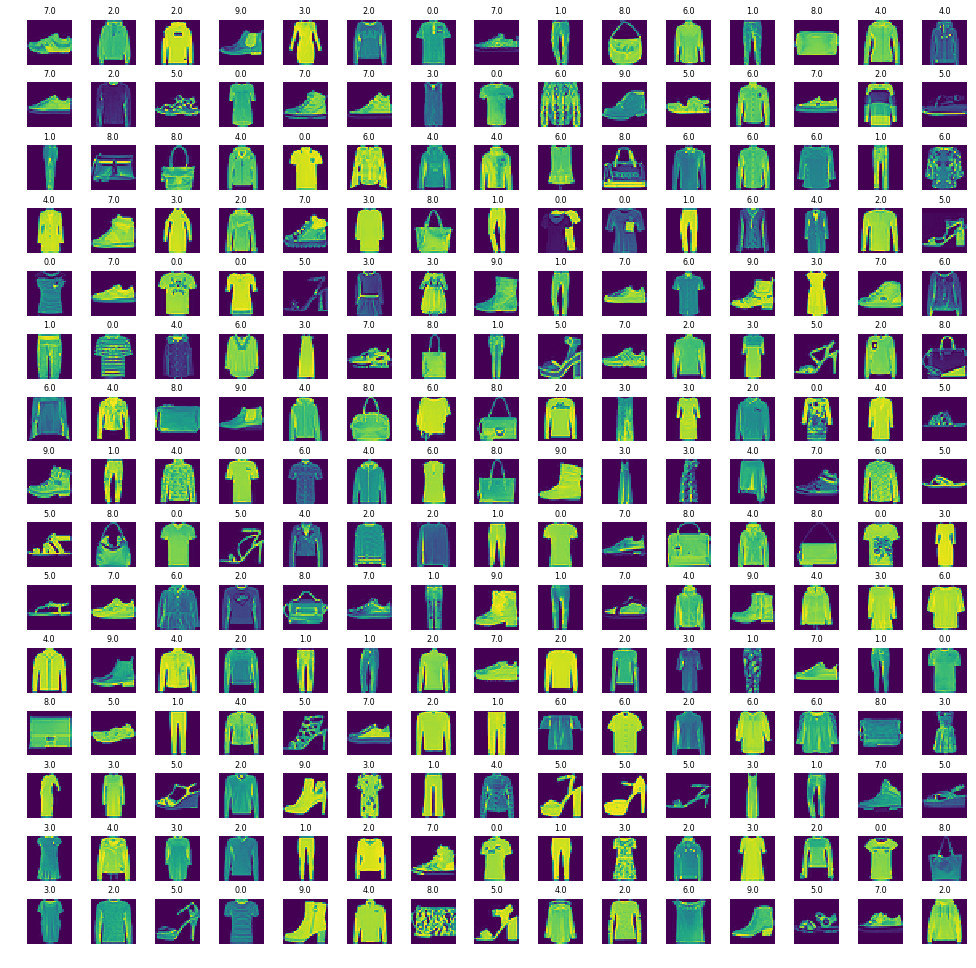

In [11]:
w_grid=15
l_grid=15

fig,axes=plt.subplots(l_grid,w_grid,figsize=(17,17))

axes = axes.ravel()  

n_training = len(training) 

for i in np.arange(0,w_grid*l_grid): 
    
    index = np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0],fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

Making the x_train and y_train, we remove the first colums as it includes the label

In [12]:
x_train=training[:,1:]/255
y_train= training[:,0]

In [13]:
x_test= testing[:,1:]/255
y_test=testing[:,0]

Spliting the data into train and test

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_vali,y_train,y_vali=train_test_split(x_train,y_train,test_size = 0.2, random_state = 12345)

In [15]:
X_train =X_train.reshape(X_train.shape[0],*(28,28,1))
x_test = x_test.reshape(x_test.shape[0],*(28,28,1))
X_vali = X_vali.reshape(X_vali.shape[0],*(28,28,1))

Checking the shape of X.train

In [16]:
X_train.shape

(48000, 28, 28, 1)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [18]:
clf= Sequential()
clf.add(Conv2D(32,3,3,input_shape= (28,28,1),activation='relu'))
clf.add(MaxPooling2D(pool_size =(2,2)))
clf.add(Flatten())
clf.add(Dense(output_dim= 32,activation='relu'))
clf.add(Dense(output_dim= 10,activation='sigmoid'))

/Users/snigdha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  
/Users/snigdha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """
/Users/snigdha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [19]:
clf.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [ ]:
clf.fit(X_train,
       y_train,
       batch_size= 512,
       epochs=50,
        verbose=1,
        validation_data=(X_vali,y_vali))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50


In [ ]:
evaluation=clf.evaluate(x_test,y_test)
print('Test Accuracy:{:.3f}'.format(evaluation[1]))

In [ ]:
pred=clf.predict_classes(x_test)


In [ ]:
L=5
W=5

fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class = {:0.1f}\n True class = {:0.1f}'.format(pred[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(14,10))
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import classification_report

num_classes=10
target_names=["class {}".format(i)for i in range (num_classes)]

print(classification_report(y_test,pred,target_names=target_names))